The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [120]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Read in the Nobel Prize data
nobel = pd.read_csv("data/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [121]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].mode()[0]
top_country = nobel['birth_country'].mode()[0]
print("The gender with the most Nobel laureates is :", top_gender)
print("The most common birth country of Nobel laureates is :", top_country)

The gender with the most Nobel laureates is : Male
The most common birth country of Nobel laureates is : United States of America


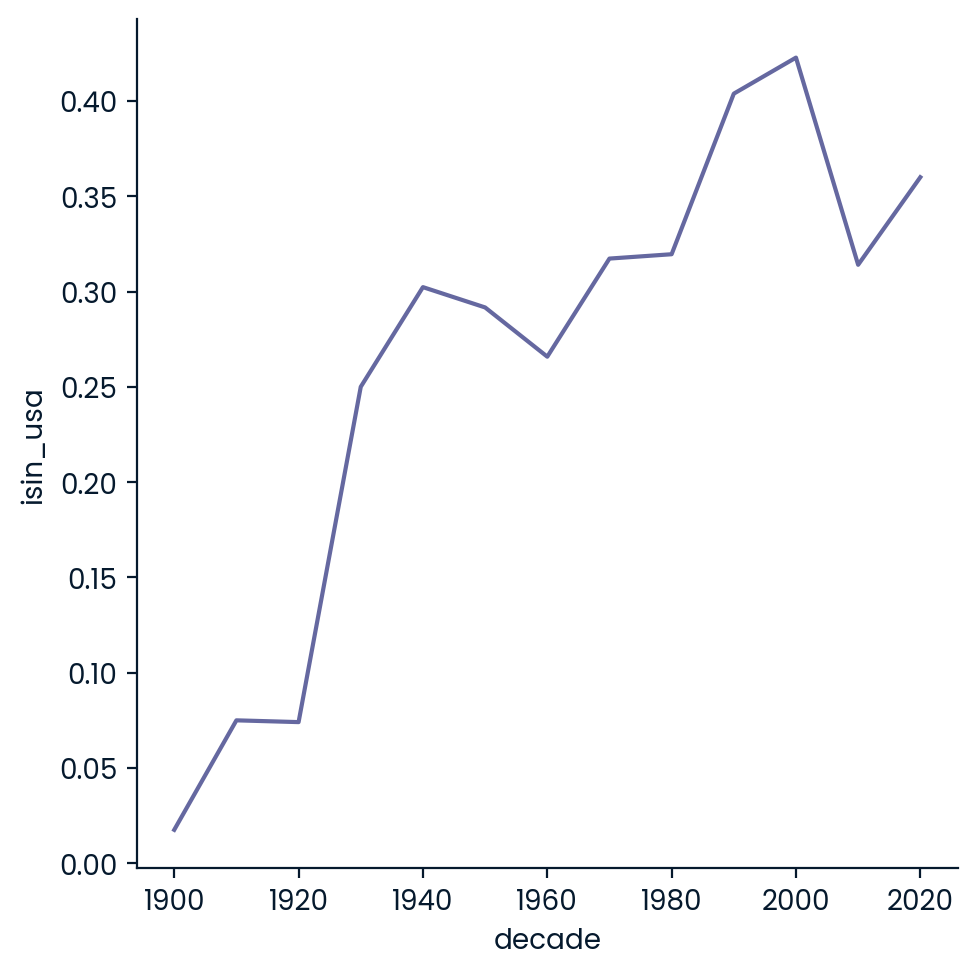

In [122]:
# Calculate the proportion of USA born winners per decade
nobel['isin_usa'] = nobel['birth_country']=='United States of America'
nobel['decade']= (nobel['year']//10)*10 
ratio_usa_winners = nobel.groupby('decade', as_index = False)['isin_usa'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = ratio_usa_winners[ratio_usa_winners['isin_usa'] == ratio_usa_winners['isin_usa'].max()]['decade'].values[0]

# Plotting USA born winners
sns.relplot(x='decade',y='isin_usa',data=ratio_usa_winners,kind="line")


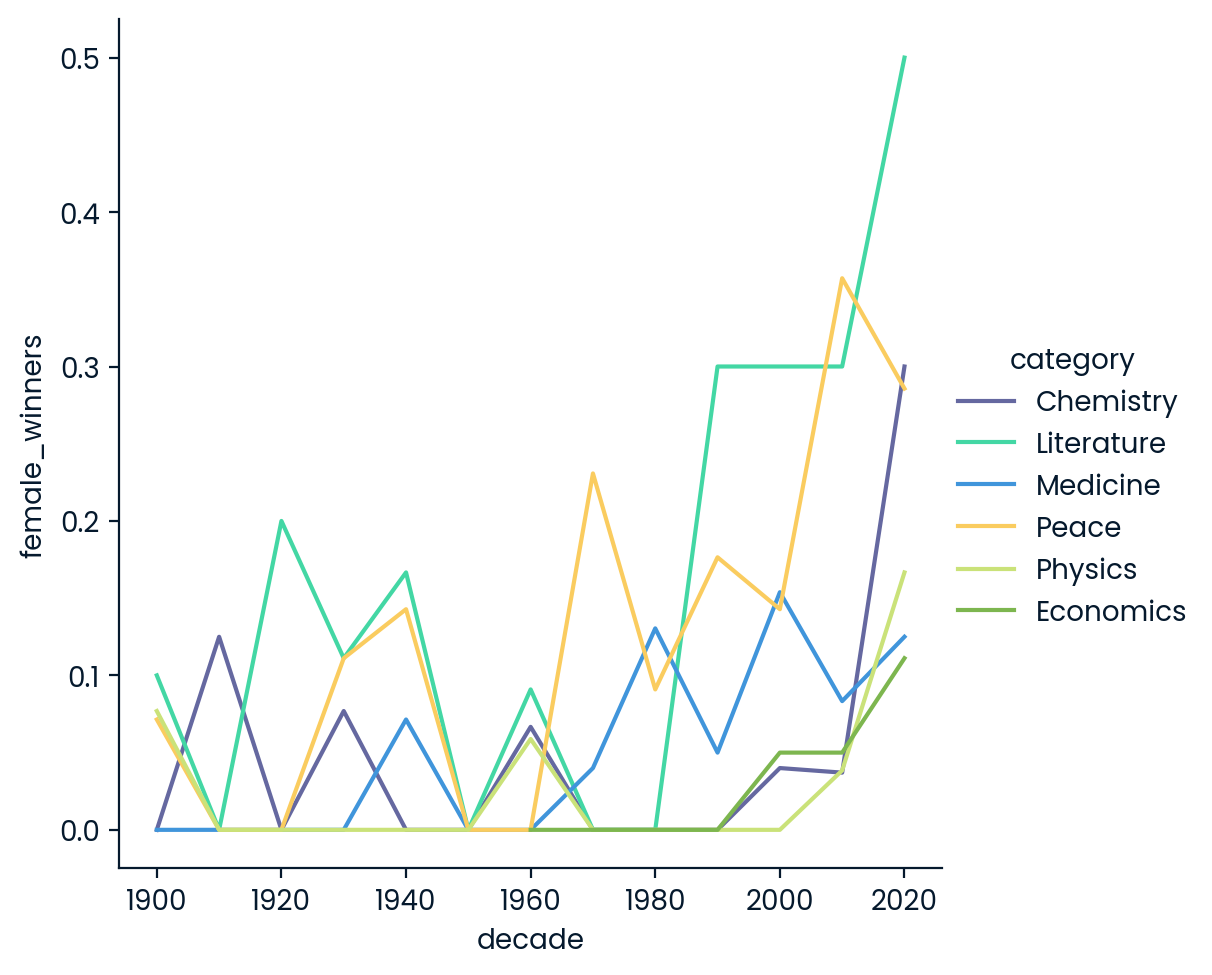

In [123]:
# Calculating the proportion of female laureates per decade
nobel['female_winners']=nobel['sex']=="Female"
prop_female_winners = nobel.groupby(['decade','category'],as_index=False)['female_winners'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winners']==prop_female_winners['female_winners'].max()][['decade','category']] 

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]:max_female_decade_category['category'].values[0]}

# Plotting female winners with % winners on the y-axis
sns.relplot(x='decade',y='female_winners',data=prop_female_winners,hue='category',kind='line')

In [124]:
#Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winners']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n First woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 First woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [125]:
# Selecting the laureates that have received 2 or more prizes
count = nobel['full_name'].value_counts()
repeats = count[count>=2].index
repeat_list = list(repeats)

print("The repeat winners are :",repeat_list)

The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
